In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)

(74, 5148)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 2. F2( N features ) → F3( 2N/3 features out of selected features from F2) →    
##           F1(N/3 features out of selected features from F3)

# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df["gene"].unique())
df.gene[df.gene == 'ALL'] = 0
df.gene[df.gene == 'AML'] = 1
print('Updated value of gene : '+str(df["gene"].unique()))


['ALL' 'AML']
Updated value of gene : [0 1]


C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [5]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [6]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [7]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [8]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

In [11]:
y_train.shape, y_test.shape

((57,), (15,))

In [12]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 3431.3333333333335
number_of_features_required_2 : 1715.6666666666667
number_of_features_required_3 : 977.9300000000001
number_of_features_required_1 in integers: 3431
number_of_features_required_2 in integers: 1715
number_of_features_required_3 in integers: 977


# Selection of features using F Classification 

In [13]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :201.24775290489197 seconds


In [14]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 4726


In [15]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['D87742_at', 'U70671_at', 'U51990_at', 'HG4236-HT4506_f_at', 'AC000063_s_at', 'Z25884_at', 'U11875_s_at', 'M64571_at', 'U90878_at', 'M60331_at', 'Y08915_at', 'M33317_f_at', 'Y00636_at', 'U14391_at', 'U64315_s_at', 'M11718_at', 'D87433_at', 'D38549_at', 'J02874_at', 'X89267_at', 'X98206_at', 'D45399_at', 'M60091_at', 'U02687_at', 'U75679_at', 'M94880_f_at', 'M31165_at', 'D63881_at', 'Y10505_at', 'U58130_at', 'L47345_at', 'L77886_at', 'U09848_at', 'X74837_at', 'D14043_at', 'L09235_at', 'M26576_cds2_at', 'X03794_s_at', 'U49250_at', 'D25274_at', 'X15949_at', 'D83780_at', 'M23379_at', 'U68142_at', 'Y10659_at', 'S72869_at', 'M21186_at', 'U03272_at', 'X80907_at', 'HG3921-HT4191_f_at', 'HG919-HT919_at', 'M87770_at', 'U18259_at', 'D50063_at', 'X98225_at', 'HG4167-HT4437_at', 'X68688_rna1_s_at', 'L21934_at', 'M24069_at', 'L06845_at', 'M33552_at', 'U26710_at', 'U90909_at', 'U26648_at', 'M62397_at', 'Z49148_s_at', 'U15552_at', 'Z30643_at', 'U50527_s_at', '

In [16]:
required_features_fc = selected_features_fc[:number_of_features_required_1]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 3431


In [17]:
X_train1 = X_train[required_features_fc]
X_train1.head()

,D87742_at,U70671_at,U51990_at,HG4236-HT4506_f_at,AC000063_s_at,Z25884_at,U11875_s_at,M64571_at,U90878_at,M60331_at,...,U09820_s_at,M34376_s_at,M10901_at,U61234_at,X98296_at,M91083_at,X64037_at,M88108_at,Z69881_at,HG3141-HT3317_f_at
55,-0.608045,0.095755,-1.152976,-0.931404,-1.211298,-0.259680,-0.166643,-0.566004,-0.362620,-0.819694,...,-0.460682,2.797136,0.211864,-0.677717,-0.765311,-0.581986,-0.394496,-1.000099,-0.757636,0.180563
70,0.187451,1.988516,-1.100860,1.595995,1.786710,2.705878,1.714689,1.208070,-0.256901,-0.134205,...,0.758378,0.990852,0.660589,0.135677,0.081138,3.595564,3.679501,-0.859393,0.804632,-3.172993
62,-0.419283,-0.438842,-1.689033,-0.478059,0.122779,-0.908520,1.033186,-0.634567,-0.661631,-0.134205,...,-0.784944,0.301430,-0.332333,-0.721792,-1.269266,-0.724030,-0.493552,-0.063437,-0.017162,-0.612381
43,1.036878,-0.130606,-0.669036,-3.436135,1.757389,1.113632,-0.128248,2.266515,1.450382,-1.439270,...,-0.136420,-2.842332,-0.439741,0.564412,-0.696812,2.182408,-0.061769,-0.677302,0.565300,-2.323634
4,0.996429,-0.544798,0.998694,-0.160717,-1.343239,-1.529496,-0.205037,1.195214,-0.123569,0.327182,...,-0.181571,-0.622394,0.288243,0.868933,0.291528,-0.429015,0.717980,0.702171,-0.050219,1.033055


# Feature Selection Using T-Test

In [18]:
import statistics

In [19]:
temp_index = ['gene'] + required_features_fc
new_df = df[temp_index]
new_df.shape

(72, 3432)

In [20]:
start_time_t = time.time()
x= new_df.values         # It is converting df into numpy arrray

a,b = x.shape           # Here, a is taking row and b is taking columns of x

n1 =0;
n2 = 0;

for i in range(a):     
    if x[i][0] == 1:
        n1=n1 + 1;
    else:
        n2=n2 + 1;


sample1 = []
sample2= []
tval=[]

# It is calculating t-test

for j in range(1,b):      
    for i in range(a):

        if x[i][0]== 1:           
            sample1.append(x[i][j])
        else:
            sample2.append(x[i][j])


 # It is converting sample values from string to integer
    sample1 = list(map(int,sample1))       
    sample2 = list(map(int,sample2))


    s1bar = statistics.mean(sample1)         
    s2bar = statistics.mean(sample2)

    s1var = statistics.variance(sample1)      
    s2var = statistics.variance(sample2)



    t = abs(s1bar - s2bar)/np.sqrt(s1var/n1+s2var/n2)        # It is calculating t value by comparing mean and variance using given formula

    tval.append(t)       

    sample1.clear()      
    sample2.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   


new_index = [p+1 for p in sort_index]    #It is increasing sorted index by 1 because we have to fetch it from dataframe for corresponding columns

new_index.reverse()     


required_features_t = new_index[:number_of_features_required_2]   #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :2.4135515689849854 seconds


In [21]:
print(required_features_t)

[683, 986, 2994, 1245, 3028, 381, 1299, 1886, 181, 2590, 2227, 1558, 812, 441, 2537, 2776, 1790, 303, 418, 1836, 3199, 2939, 1844, 1534, 178, 2632, 910, 2128, 1128, 3108, 3205, 1408, 1687, 1345, 1251, 2166, 1922, 3162, 839, 953, 2161, 3188, 2114, 2201, 3059, 2562, 1671, 1184, 2806, 3172, 2856, 1223, 628, 552, 508, 2229, 2550, 76, 2218, 364, 768, 2905, 1136, 133, 2230, 2038, 1212, 902, 3259, 726, 629, 2194, 2514, 2025, 2993, 2381, 2548, 3019, 3117, 1515, 3430, 513, 1536, 2962, 1883, 1509, 492, 1811, 2498, 2814, 2167, 2113, 3224, 448, 1901, 196, 1137, 2075, 1090, 2968, 2411, 1209, 970, 2118, 1589, 3203, 2231, 806, 2001, 899, 819, 2493, 2069, 3112, 511, 2490, 2563, 612, 534, 701, 147, 1677, 3, 1356, 85, 3040, 2654, 426, 3125, 3229, 2103, 349, 1388, 49, 2914, 3083, 835, 1628, 934, 3043, 1975, 966, 322, 635, 1433, 2402, 2723, 560, 1956, 1363, 2394, 719, 2453, 2089, 2737, 2744, 3399, 146, 174, 1631, 729, 1140, 2175, 1889, 2339, 1684, 2062, 201, 882, 1708, 2268, 103, 1335, 2243, 1800, 645, 24

In [22]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  1715


In [23]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['HG315-HT315_at', 'L17131_rna1_at', 'X12447_at', 'M14058_at', 'X15357_at', 'D55654_at', 'M20218_at', 'U01160_at', 'D16562_at', 'U65404_at', 'U31930_at', 'M63175_at', 'J04031_at', 'D79988_at', 'U59919_at', 'U79718_at', 'S50223_at', 'D38553_at', 'D64154_at', 'S77576_at', 'X63578_rna1_at', 'X03066_at', 'S78569_at', 'M60752_at', 'D16294_at', 'U68018_at', 'L07758_at', 'U21128_at', 'L38820_at', 'X55079_rna1_at', 'X64037_at', 'M31013_at', 'M86667_at', 'M24364_at', 'M14200_rna1_at', 'U25956_at', 'U04313_at', 'X60036_at', 'J04794_at', 'L13278_at', 'U25433_at', 'X62691_at', 'U20325_at', 'U29700_at', 'X17620_at', 'U61849_at', 'M83941_at', 'L42450_at', 'U83115_at', 'X61072_at', 'U90313_at', 'M11119_at', 'HG1103-HT1103_at', 'D87120_at', 'D85758_at', 'U32114_at', 'U60644_at', 'AF005775_at', 'U31248_at', 'D50911_at', 'HG908-HT908_at', 'U95006_at', 'L38961_at', 'D13633_at', 'U32315_at', 'U14528_at', 'L77559_at', 'L07493_at', 'X68560_at', 'HG4058-HT4328_at', 'HG1111-HT1111_at', 

In [24]:
X_train2 = X_train.iloc[:,required_features_t]
X_train2.head()

,HG3162-HT3339_at,L17328_at,X12451_at,M14091_at,X15393_rna1_at,D55716_at,M20471_at,U01212_at,D16581_at,U65410_at,...,D30755_at,X65550_at,D38535_at,X77166_at,U66702_at,L20010_at,D29677_at,L37043_at,S90469_at,X07979_at
55,-0.651457,-0.314310,-0.273346,-0.828787,-0.547131,-0.018741,0.582275,-0.345557,-0.892464,-0.293636,...,-0.963420,1.600178,-0.372564,0.430564,-0.646018,-0.242312,-0.980386,-0.774826,0.028829,-0.989860
70,0.879754,3.417281,-0.067083,2.716124,0.529832,-0.116318,1.303548,-0.174033,-1.265055,-0.830684,...,0.325363,-0.655721,2.210974,0.159907,1.688498,0.323984,0.408632,0.343429,1.527000,-0.420528
62,0.274392,0.197279,-0.274778,0.415041,-1.072015,0.371568,1.386453,-0.405019,1.021805,0.798362,...,-0.430405,0.796214,0.547103,0.961469,-0.911555,0.003141,-0.077966,-1.328043,0.897997,1.341180
43,1.032876,1.897561,-0.307723,3.286213,0.597822,0.594601,-1.080560,-0.190042,1.954398,-2.432878,...,-0.806963,-1.033704,1.775342,-0.464686,1.168487,-0.082767,-0.958267,-0.231065,2.161721,-0.115720
4,-0.687067,0.362794,-0.443799,-0.123951,-0.786457,0.647572,1.584240,-0.464480,0.330169,0.878919,...,0.577286,0.226240,-0.850549,1.565242,-1.154965,-0.049456,0.740404,1.253637,0.309022,-0.049925


# Selection of features using Mutual Information 

In [25]:

from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  
  combo_d= np.vstack((x,y)).T # It is Combining the data values
  
  n=len(x)
  n_x=[]
  unique_y=len(set(y))

  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=item[1]
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
    # Calculating distance of a point with all other points in the same class
    for pt_c in n_x[pt[1]]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    
    k=3
    kth_dist_c=distx[k-1]
    dist=[]
    
   #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1

    n_x_i=len(n_x[pt[1]])

    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx=indx + 1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)

In [26]:
X_train_tp=X_train2.values.transpose()
mi_start_time = time.time()
 
total_features=len(required_features_t)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Gene and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Gene and Feature_AFFX-BioC-5_at :  0.008616349789146858
Mutual Information between Gene and Feature_hum_alu_at :  0.08079861479894791
Mutual Information between Gene and Feature_AFFX-DapX-M_at :  0.021386299710799573
Mutual Information between Gene and Feature_AFFX-LysX-5_at :  0.11264987395385705
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MA_at :  0.133311234759818
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MB_at :  0.027531416972912073
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_3_at :  0.011132153950706278
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_5_at :  0.03047116266279443
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_M_at :  0.06575053035700837
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_3_at :  0.022778828567353065
Mutual Information between Gene and Feature_AFFX-HUMGAPDH/M33197_5_at :  0.03866774833899743
Mutual Information betw

Mutual Information between Gene and Feature_D11086_at :  0.01725631015226185
Mutual Information between Gene and Feature_D11094_at :  0.004348732693600841
Mutual Information between Gene and Feature_D11139_at :  0.0159242289476886
Mutual Information between Gene and Feature_D11151_at :  0.08678187159489824
Mutual Information between Gene and Feature_D11428_at :  0.08213458160921498
Mutual Information between Gene and Feature_D12485_at :  0.10307937984287086
Mutual Information between Gene and Feature_D12625_at :  0.09310108844043083
Mutual Information between Gene and Feature_D13118_at :  0.09086640249016724
Mutual Information between Gene and Feature_D13168_at :  0.08529769577880128
Mutual Information between Gene and Feature_D13264_at :  0.13495066186895166
Mutual Information between Gene and Feature_D13315_at :  0.04641349054783235
Mutual Information between Gene and Feature_D13370_at :  0.05032442495943302
Mutual Information between Gene and Feature_D13435_at :  0.10824481411047232

Mutual Information between Gene and Feature_D31885_at :  0.11538703835795973
Mutual Information between Gene and Feature_D31886_at :  0.1143338517784573
Mutual Information between Gene and Feature_D31887_at :  0.07801351820049159
Mutual Information between Gene and Feature_D31888_at :  0.00436044125794096
Mutual Information between Gene and Feature_D31890_at :  0.06144206978450819
Mutual Information between Gene and Feature_D31891_at :  0.044073573646647685
Mutual Information between Gene and Feature_D32001_at :  0.08380604263324556
Mutual Information between Gene and Feature_D32050_at :  0.049178422894822486
Mutual Information between Gene and Feature_D32202_at :  0.07632429797942984
Mutual Information between Gene and Feature_D37931_at :  0.0015718159127063246
Mutual Information between Gene and Feature_D38047_at :  0.009239287419172636
Mutual Information between Gene and Feature_D38048_at :  0.07921828508394328
Mutual Information between Gene and Feature_D38076_at :  0.0378298399363

Mutual Information between Gene and Feature_D78134_at :  0.023179684254306297
Mutual Information between Gene and Feature_D78151_at :  0.08663607755834504
Mutual Information between Gene and Feature_D78156_at :  0.010742046981651928
Mutual Information between Gene and Feature_D78275_at :  0.0004805725614010365
Mutual Information between Gene and Feature_D78333_at :  0.026184671524013922
Mutual Information between Gene and Feature_D78334_at :  0.007727764690035397
Mutual Information between Gene and Feature_D78335_at :  0.0531842314183107
Mutual Information between Gene and Feature_D78361_at :  0.034405011690476515
Mutual Information between Gene and Feature_D78367_at :  0.05189481469232567
Mutual Information between Gene and Feature_D78514_at :  0.12466295479331888
Mutual Information between Gene and Feature_D78586_at :  0.07400713629694308
Mutual Information between Gene and Feature_D78611_at :  0.015481923979161117
Mutual Information between Gene and Feature_D79205_at :  0.0244801160

Mutual Information between Gene and Feature_D88213_at :  0.09094569017820697
Mutual Information between Gene and Feature_D88270_at :  0.12127715214281037
Mutual Information between Gene and Feature_D88378_at :  0.0016751356884900457
Mutual Information between Gene and Feature_D88422_at :  0.07683940172981327
Mutual Information between Gene and Feature_D88532_at :  0.014750757569309885
Mutual Information between Gene and Feature_D88613_at :  0.07209819499171692
Mutual Information between Gene and Feature_D88795_at :  0.04770776157894544
Mutual Information between Gene and Feature_D88797_at :  0.08954254778707682
Mutual Information between Gene and Feature_D88799_at :  0.05900453551749695
Mutual Information between Gene and Feature_D89016_at :  0.16812598863031394
Mutual Information between Gene and Feature_D89052_at :  0.06268318168200933
Mutual Information between Gene and Feature_D89077_at :  0.13138656743798416
Mutual Information between Gene and Feature_D89289_at :  0.03236149736054

Mutual Information between Gene and Feature_HG3548-HT3749_at :  0.025823393796744865
Mutual Information between Gene and Feature_HG3549-HT3751_at :  0.06788460485950394
Mutual Information between Gene and Feature_HG3566-HT3769_at :  0.015079473687499699
Mutual Information between Gene and Feature_HG3570-HT3773_at :  0.04234040176085562
Mutual Information between Gene and Feature_HG3578-HT3781_at :  0.2874314169270917
Mutual Information between Gene and Feature_HG358-HT358_at :  0.03995352750892192
Mutual Information between Gene and Feature_HG3627-HT3836_at :  0.0240312583796391
Mutual Information between Gene and Feature_HG363-HT363_at :  0.07826831448471407
Mutual Information between Gene and Feature_HG37-HT37_at :  0.10024386893949293
Mutual Information between Gene and Feature_HG3740-HT4010_at :  0.10282494158533667
Mutual Information between Gene and Feature_HG3748-HT4018_at :  0.1207637279451756
Mutual Information between Gene and Feature_HG384-HT384_at :  0.031627837604284635
Mu

Mutual Information between Gene and Feature_J04173_at :  0.029038320855991416
Mutual Information between Gene and Feature_J04177_at :  0.007631606097476173
Mutual Information between Gene and Feature_J04444_at :  0.05954749803654188
Mutual Information between Gene and Feature_J04456_at :  0.1573195905100672
Mutual Information between Gene and Feature_J04469_at :  0.05463294323853947
Mutual Information between Gene and Feature_J04501_at :  0.03389708581537556
Mutual Information between Gene and Feature_J04543_at :  0.07295740039357851
Mutual Information between Gene and Feature_J04605_at :  0.0014083702901457153
Mutual Information between Gene and Feature_J04611_at :  0.06009566607211315
Mutual Information between Gene and Feature_J04615_at :  0.0765667739757971
Mutual Information between Gene and Feature_J04621_at :  0.10831640680060825
Mutual Information between Gene and Feature_J04739_at :  0.018851897085976316
Mutual Information between Gene and Feature_J04742_at :  0.06029663831154

Mutual Information between Gene and Feature_L13278_at :  0.010341545923256125
Mutual Information between Gene and Feature_L13286_at :  0.07993754632952033
Mutual Information between Gene and Feature_L13329_at :  0.08137796750678365
Mutual Information between Gene and Feature_L13391_at :  0.08811375121625158
Mutual Information between Gene and Feature_L13434_at :  0.13753409022106358
Mutual Information between Gene and Feature_L13689_at :  0.05259341818571986
Mutual Information between Gene and Feature_L13698_at :  0.013793018342887093
Mutual Information between Gene and Feature_L13738_at :  0.019108073603748305
Mutual Information between Gene and Feature_L13761_rna1_at :  0.12581113229285382
Mutual Information between Gene and Feature_L13800_at :  0.010163992675406124
Mutual Information between Gene and Feature_L13848_at :  0.07950654458272906
Mutual Information between Gene and Feature_L13852_at :  0.1229542244072103
Mutual Information between Gene and Feature_L13923_at :  0.027079997

Mutual Information between Gene and Feature_L39211_at :  0.027808177017488465
Mutual Information between Gene and Feature_L39833_at :  0.022381359825965386
Mutual Information between Gene and Feature_L39874_at :  0.02007899099882876
Mutual Information between Gene and Feature_L40027_at :  0.09146505390965945
Mutual Information between Gene and Feature_L40157_at :  0.018421850032986468
Mutual Information between Gene and Feature_L40357_at :  0.22426077874626926
Mutual Information between Gene and Feature_L40377_at :  0.08591428011300005
Mutual Information between Gene and Feature_L40379_at :  0.07185308692927142
Mutual Information between Gene and Feature_L40380_at :  0.09077156557439357
Mutual Information between Gene and Feature_L40387_at :  0.14824254284659114
Mutual Information between Gene and Feature_L40388_at :  0.11486472849747979
Mutual Information between Gene and Feature_L40391_at :  0.04826103947770477
Mutual Information between Gene and Feature_L40392_at :  0.05554597599610

Mutual Information between Gene and Feature_M15990_at :  0.13303890217324396
Mutual Information between Gene and Feature_M16038_at :  0.09935380663125079
Mutual Information between Gene and Feature_M16279_at :  0.006602507722896395
Mutual Information between Gene and Feature_M16282_at :  0.043598065518785055
Mutual Information between Gene and Feature_M16405_at :  0.21125849962658752
Mutual Information between Gene and Feature_M16424_at :  0.15589630076593664
Mutual Information between Gene and Feature_M16447_at :  0.05054862928607019
Mutual Information between Gene and Feature_M16505_at :  0.011627746372052258
Mutual Information between Gene and Feature_M16801_at :  0.08861157210880927
Mutual Information between Gene and Feature_M16961_at :  0.06495574626012228
Mutual Information between Gene and Feature_M17219_at :  0.04717488372408621
Mutual Information between Gene and Feature_M17262_at :  0.006815376584407778
Mutual Information between Gene and Feature_M17733_at :  0.0304957825790

Mutual Information between Gene and Feature_M34344_at :  0.08189821566104041
Mutual Information between Gene and Feature_M34423_at :  0.19329439466156814
Mutual Information between Gene and Feature_M34455_at :  0.0010765645090305858
Mutual Information between Gene and Feature_M34539_at :  0.0353351001836948
Mutual Information between Gene and Feature_M34667_at :  0.020192970941441114
Mutual Information between Gene and Feature_M34668_at :  0.05099851107712532
Mutual Information between Gene and Feature_M34677_at :  0.09263524408382737
Mutual Information between Gene and Feature_M35128_at :  0.03388829649788497
Mutual Information between Gene and Feature_M35252_at :  0.06859333493111491
Mutual Information between Gene and Feature_M35296_at :  0.03560449147014967
Mutual Information between Gene and Feature_M35416_at :  0.05628049272026157
Mutual Information between Gene and Feature_M35878_at :  0.15372967779346702
Mutual Information between Gene and Feature_M36067_at :  0.115563101363988

Mutual Information between Gene and Feature_M74002_at :  0.11376514966637584
Mutual Information between Gene and Feature_M74089_at :  0.00018899416203705904
Mutual Information between Gene and Feature_M74091_at :  0.018029761328204268
Mutual Information between Gene and Feature_M74093_at :  0.061978428886520096
Mutual Information between Gene and Feature_M74096_at :  0.017361971176545768
Mutual Information between Gene and Feature_M74099_at :  0.04434449258100159
Mutual Information between Gene and Feature_M74491_at :  0.030621241934235946
Mutual Information between Gene and Feature_M74524_at :  0.06396706456956486
Mutual Information between Gene and Feature_M74525_at :  0.05290741987988923
Mutual Information between Gene and Feature_M74558_at :  0.04160516720766749
Mutual Information between Gene and Feature_M74719_at :  0.052031069849622136
Mutual Information between Gene and Feature_M74826_at :  0.03616611303020877
Mutual Information between Gene and Feature_M75099_at :  0.018895154

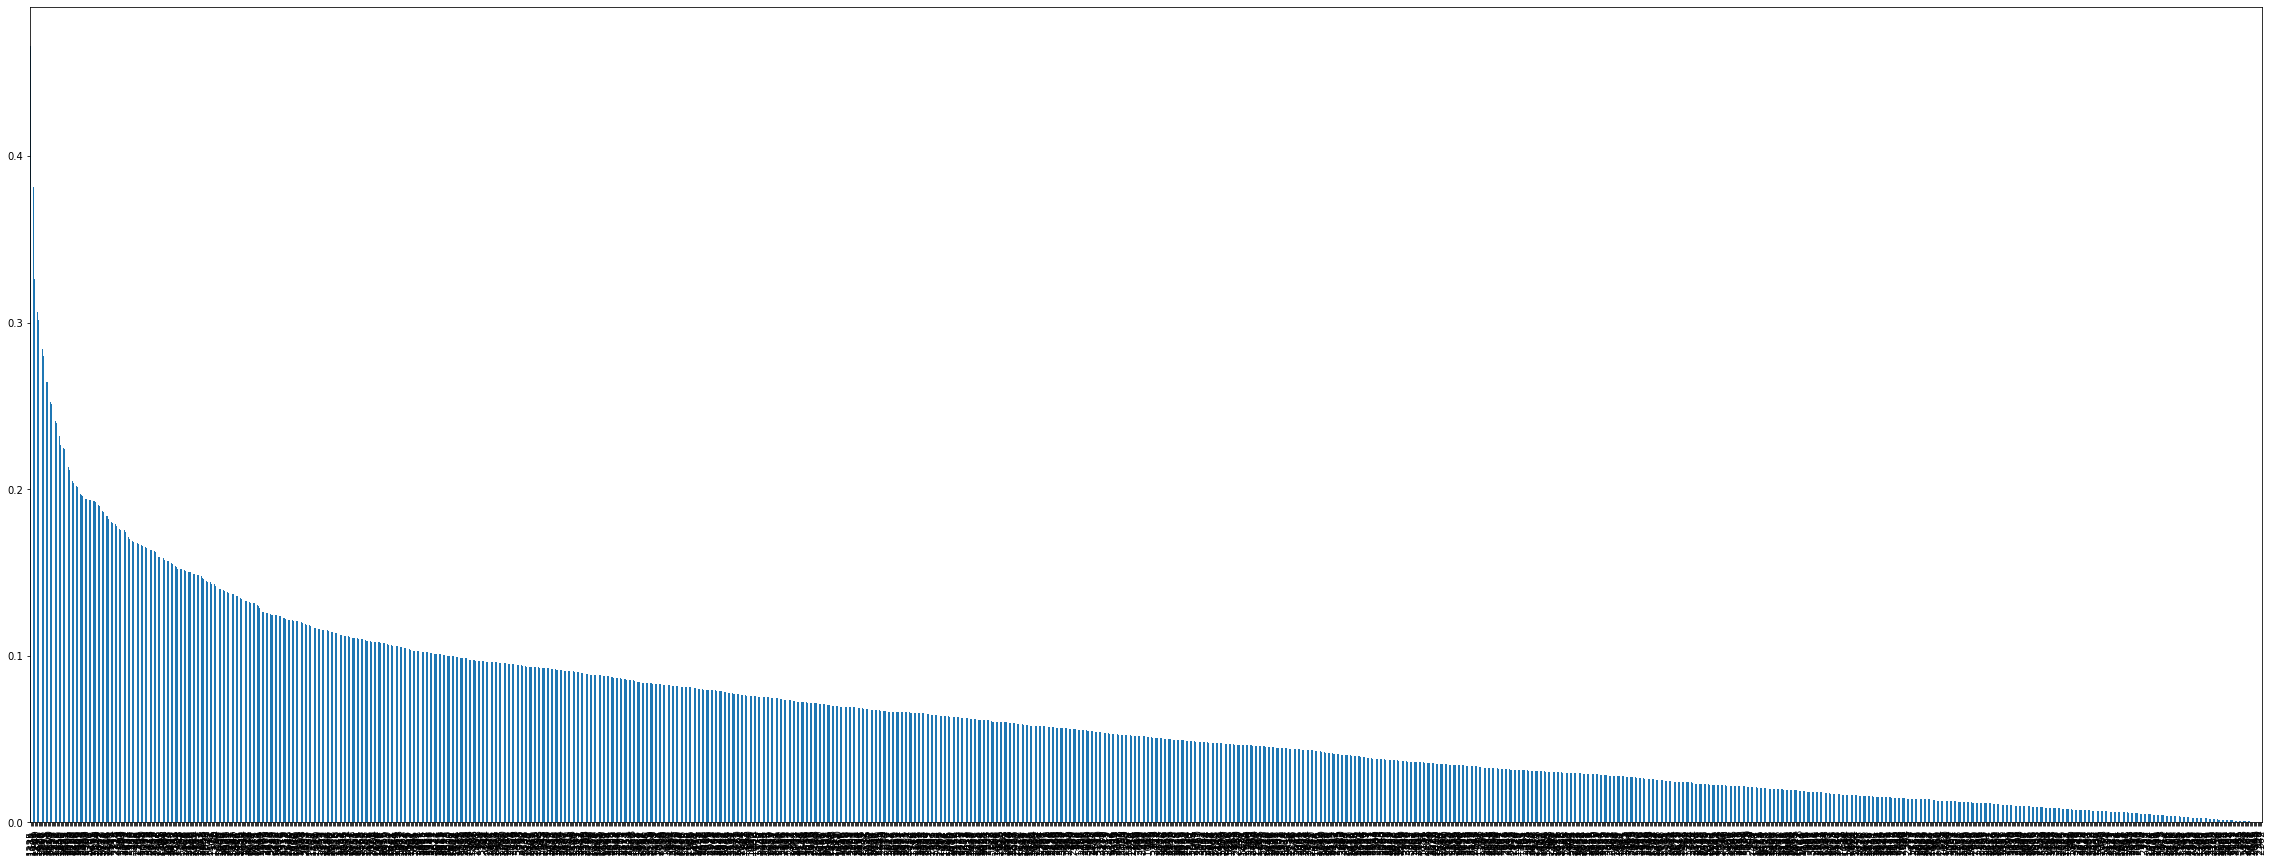

In [27]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [28]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_3]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_3):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  D15057_at
Selected Feature 2 is :  M64098_at
Selected Feature 3 is :  M11717_rna1_at
Selected Feature 4 is :  M24439_at
Selected Feature 5 is :  J03592_at
Selected Feature 6 is :  D49396_at
Selected Feature 7 is :  D87292_at
Selected Feature 8 is :  D13900_at
Selected Feature 9 is :  HG358-HT358_at
Selected Feature 10 is :  AF005775_at
Selected Feature 11 is :  D63486_at
Selected Feature 12 is :  L34357_at
Selected Feature 13 is :  M37197_at
Selected Feature 14 is :  M21812_at
Selected Feature 15 is :  D25278_at
Selected Feature 16 is :  D79997_at
Selected Feature 17 is :  D26599_at
Selected Feature 18 is :  M37583_at
Selected Feature 19 is :  L37378_at
Selected Feature 20 is :  AC000061_cds2_at
Selected Feature 21 is :  M15059_at
Selected Feature 22 is :  L11005_at
Selected Feature 23 is :  M62783_at
Selected Feature 24 is :  L20814_at
Selected Feature 25 is :  M26061_at
Selected Feature 26 is :  HG4165-HT4435_at
Selected Feature 27 is :  L40377_at
Selected Fe

Selected Feature 869 is :  L32866_at
Selected Feature 870 is :  D13435_at
Selected Feature 871 is :  AF000560_at
Selected Feature 872 is :  D45399_at
Selected Feature 873 is :  L20298_at
Selected Feature 874 is :  L42243_cds1_at
Selected Feature 875 is :  L37368_at
Selected Feature 876 is :  D29012_at
Selected Feature 877 is :  D87455_at
Selected Feature 878 is :  D59253_at
Selected Feature 879 is :  AF007875_at
Selected Feature 880 is :  M74002_at
Selected Feature 881 is :  M32053_at
Selected Feature 882 is :  L40636_at
Selected Feature 883 is :  D31716_at
Selected Feature 884 is :  L23959_at
Selected Feature 885 is :  AFFX-HUMGAPDH/M33197_M_st
Selected Feature 886 is :  J00129_at
Selected Feature 887 is :  D32202_at
Selected Feature 888 is :  L24559_at
Selected Feature 889 is :  J04058_at
Selected Feature 890 is :  L09190_rna1_at
Selected Feature 891 is :  M88163_at
Selected Feature 892 is :  L25119_at
Selected Feature 893 is :  M38591_at
Selected Feature 894 is :  M24470_at
Selected

In [29]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 977
['D15057_at', 'M64098_at', 'M11717_rna1_at', 'M24439_at', 'J03592_at', 'D49396_at', 'D87292_at', 'D13900_at', 'HG358-HT358_at', 'AF005775_at', 'D63486_at', 'L34357_at', 'M37197_at', 'M21812_at', 'D25278_at', 'D79997_at', 'D26599_at', 'M37583_at', 'L37378_at', 'AC000061_cds2_at', 'M15059_at', 'L11005_at', 'M62783_at', 'L20814_at', 'M26061_at', 'HG4165-HT4435_at', 'L40377_at', 'M87503_at', 'J03589_at', 'D87953_at', 'M16424_at', 'L13278_at', 'M21005_at', 'L32163_at', 'D87434_at', 'L15409_at', 'J00124_at', 'L07077_at', 'L32164_at', 'M14113_at', 'AF005887_at', 'AF007551_at', 'L25081_at', 'L40411_at', 'D86519_at', 'J05556_at', 'J05257_at', 'M34455_at', 'D10923_at', 'M11722_at', 'D49489_at', 'L37199_at', 'M14539_at', 'M63167_at', 'L38503_at', 'M59979_at', 'D83657_at', 'D38549_at', 'M19283_at', 'M69023_at', 'L41887_rna1_at', 'D11086_at', 'D50310_at', 'M24899_at', 'D82344_at', 'D00762_at', 'M64571_at', 'D84454_at', 'L29008_at', 'D86963_at', 'D42054_at', 'HG4018

In [30]:
X_train3 = X_train[required_features_mi]
X_train3.head()

,D15057_at,M64098_at,M11717_rna1_at,M24439_at,J03592_at,D49396_at,D87292_at,D13900_at,HG358-HT358_at,AF005775_at,...,D87453_at,L19401_at,M23294_at,D32001_at,M22960_at,L28821_at,D83767_at,D87457_at,M60721_at,M68941_at
55,-0.286447,-0.802735,-0.209404,-1.396855,-0.217773,0.116034,0.547968,-0.069855,-0.647790,-0.518444,...,0.633499,-0.706105,-0.394751,-0.591417,-0.595852,-0.266462,1.038651,0.936268,-0.472799,-0.813444
70,-0.756384,2.803903,-0.085765,3.793299,-1.203731,-0.734087,0.671869,1.377328,3.094278,1.287959,...,0.946437,3.249710,-0.991202,2.824178,1.944646,6.812338,1.122614,-0.179112,0.704616,2.863731
62,0.002745,1.287365,0.080144,-0.952852,-0.037198,3.907941,2.671165,0.576633,-0.606258,0.429016,...,1.711931,-2.991687,1.045033,0.587514,0.499433,-0.056151,-0.458686,1.742272,0.370393,-0.671694
43,-0.552745,0.558260,-0.447700,1.157327,-0.918919,-0.587304,0.832375,0.966601,1.997823,0.442130,...,0.633499,-0.105407,-0.613231,3.011485,-0.723690,-0.773681,0.590849,0.333800,-0.851133,1.146048
4,2.839237,0.201809,-0.181401,-0.714493,1.323399,2.079263,0.787321,1.037774,-1.287389,-0.321739,...,2.188560,-0.618198,0.621181,-0.453691,0.101837,-0.070997,1.528434,1.082814,0.497635,0.087089


In [31]:
X_test3 = X_test[required_features_mi]
X_test3.head()

,D15057_at,M64098_at,M11717_rna1_at,M24439_at,J03592_at,D49396_at,D87292_at,D13900_at,HG358-HT358_at,AF005775_at,...,D87453_at,L19401_at,M23294_at,D32001_at,M22960_at,L28821_at,D83767_at,D87457_at,M60721_at,M68941_at
26,-0.467192,0.017102,-0.433434,-0.553250,-0.375048,-0.495564,1.623647,0.213354,1.520201,0.586380,...,-0.271614,1.022733,-1.172540,2.218185,-0.729107,-0.852857,-0.262772,-1.384048,-1.441537,-0.229766
27,-0.080398,0.179126,-0.449285,0.802125,0.616122,-0.654580,-0.975439,0.047284,0.203624,0.455243,...,0.325375,0.275523,-0.670036,0.986919,1.708471,1.779734,-0.094847,-0.952551,-0.929175,-0.213089
48,0.065403,-0.258337,-0.086293,-1.165506,0.604778,-1.217250,0.711291,-0.820136,-1.017428,-1.075773,...,-0.984150,-1.116338,0.459506,-1.219445,-0.160338,-0.320895,-0.024878,0.472205,-0.131790,-1.163651
22,-0.927490,-0.799495,-0.493669,-0.207396,-0.424714,-0.055214,-1.406274,-1.554107,0.124713,-0.469268,...,-0.589366,0.920175,-0.877592,-0.271893,-0.859111,-0.427287,0.464905,-0.618751,-1.237949,-0.329825
30,-0.512981,-0.666636,-0.348895,0.066016,0.615815,-0.605652,-0.584028,-0.661480,1.104877,1.786277,...,-0.772315,-0.457035,0.158004,0.356135,1.074701,0.404057,-0.612618,-1.237502,1.291627,-0.730061


In [32]:
X_test3.shape

(15, 977)

In [33]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [34]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 86.6667
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 87.7193
Testing accuracy on selected features for 2 neighbors: 80.0000
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 91.2281
Testing accuracy on selected features for 3 neighbors: 86.6667
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 84.2105
Testing accuracy on selected features for 4 neighbors: 86.6667
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.2281
Testing accuracy on selected features for 5 neighbors: 86.6667
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 85.9649
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [35]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [2 6]]
Average Confusion matrix is : [[7.         0.        ]
 [3.78947368 4.21052632]]


Confusion Matrix of KNN Classifier:


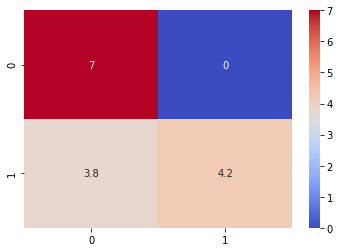

In [36]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [37]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8750000000000001
Average F-Score is : 0.7939709956004561


# SVM(Support Vector Machine)

In [38]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 100.0000
Testing accuracy on selected features: 80.0000


In [39]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[7 0]
 [3 5]]


Confusion Matrix of SVM Classifier:


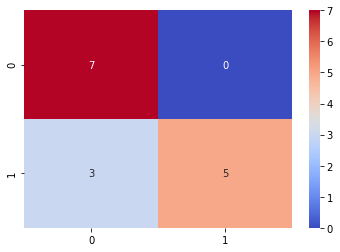

In [40]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [41]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8235294117647058
